# Neil Opitz DSC680 Project 3 Ensemble Learning Cardiac Data 

## Import Libararies

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from termcolor import colored
import seaborn as sns
from scipy.stats import kstest
from scipy.stats.stats import pearsonr
from scipy.stats import skew

C:\Users\neilo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Dataset link
https://archive.ics.uci.edu/ml/datasets/Heart+Disease

## Data Preparation

In [2]:
# import the four files

uci_va = pd.read_csv("uci_va.txt", sep=",")
uci_sw = pd.read_csv("uci_sw.txt", sep=",")
uci_hu = pd.read_csv("uci_hu.txt", sep=",")
uci_cl = pd.read_csv("uci_cl.txt", sep=",")

In [4]:
# confirm that each of the files has same columns

s1 = uci_va.shape
s2 = uci_sw.shape
s3 = uci_hu.shape
s4 = uci_cl.shape
print('number of colums: VA {} SW {} HU {} CL {}'.format(s1[1],s2[1],s3[1],s4[1]))

number of colums: VA 14 SW 14 HU 14 CL 14


In [3]:
# name columns

uci_va.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_sw.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_hu.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_cl.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']

In [4]:
# concatenate dataframes

uci = pd.concat([uci_va, uci_sw, uci_hu, uci_cl], axis=0)

# Exploratory Data Analysis

In [7]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome
0,44.0,1.0,4.0,130,209,0,1,127,0,0,?,?,?,0
1,60.0,1.0,4.0,132,218,0,1,140,1,1.5,3,?,?,2
2,55.0,1.0,4.0,142,228,0,1,149,1,2.5,1,?,?,1
3,66.0,1.0,3.0,110,213,1,2,99,1,1.3,2,?,?,0
4,66.0,1.0,3.0,120,0,0,1,120,0,-0.5,1,?,?,0


In [5]:
# replace missing with nan

uci.replace('?',np.nan, inplace=True)

In [6]:
# print the number of NaN values for each column

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']

for i in colnames:
    print('Variable: ',i)
    s = uci[i].isnull().sum()
    print('Number NaN: {}  % NaN: {}'.format(s, round(100*s/len(uci),2)))
    print()

Variable:  age
Number NaN: 0  % NaN: 0.0

Variable:  sex
Number NaN: 0  % NaN: 0.0

Variable:  cp
Number NaN: 0  % NaN: 0.0

Variable:  trestbps
Number NaN: 59  % NaN: 6.44

Variable:  chol
Number NaN: 30  % NaN: 3.28

Variable:  fbs
Number NaN: 89  % NaN: 9.72

Variable:  restecg
Number NaN: 2  % NaN: 0.22

Variable:  thalach
Number NaN: 55  % NaN: 6.0

Variable:  exang
Number NaN: 55  % NaN: 6.0

Variable:  oldpeak
Number NaN: 62  % NaN: 6.77

Variable:  slope
Number NaN: 308  % NaN: 33.62

Variable:  ca
Number NaN: 608  % NaN: 66.38

Variable:  thal
Number NaN: 483  % NaN: 52.73

Variable:  outcome
Number NaN: 0  % NaN: 0.0



In [7]:
# count non missing values in each row

uci['non_missing_count'] = uci.apply(lambda x: x.count(), axis=1)
uci['non_missing_count'].value_counts()

14    298
11    251
12    207
13     74
7      51
10     29
9       3
6       2
8       1
Name: non_missing_count, dtype: int64

In [8]:
# remove rows that are missing 5 values or more

uci = uci[uci['non_missing_count'] > 10]
uci

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome,non_missing_count
0,44.0,1.0,4.0,130,209,0,1,127,0,0,NaN,NaN,NaN,0,11
1,60.0,1.0,4.0,132,218,0,1,140,1,1.5,3,NaN,NaN,2,12
2,55.0,1.0,4.0,142,228,0,1,149,1,2.5,1,NaN,NaN,1,12
3,66.0,1.0,3.0,110,213,1,2,99,1,1.3,2,NaN,NaN,0,12
4,66.0,1.0,3.0,120,0,0,1,120,0,-0.5,1,NaN,NaN,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110,264,0,0,132,0,1.2,2,0.0,7.0,1,14
298,68.0,1.0,4.0,144,193,1,0,141,0,3.4,2,2.0,7.0,2,14
299,57.0,1.0,4.0,130,131,0,0,115,1,1.2,2,1.0,7.0,3,14
300,57.0,0.0,2.0,130,236,0,2,174,0,0,2,1.0,3.0,1,14


In [9]:
# drop the non_missing_count column

uci = uci.drop('non_missing_count', axis = 1)

In [10]:
# print the number of NaN values for each column

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']

for i in colnames:
    print('Variable: ',i)
    s = uci[i].isnull().sum()
    print('Number NaN: {}  % NaN: {}'.format(s, round(100*s/len(uci),2)))
    print()

Variable:  age
Number NaN: 0  % NaN: 0.0

Variable:  sex
Number NaN: 0  % NaN: 0.0

Variable:  cp
Number NaN: 0  % NaN: 0.0

Variable:  trestbps
Number NaN: 2  % NaN: 0.24

Variable:  chol
Number NaN: 10  % NaN: 1.2

Variable:  fbs
Number NaN: 79  % NaN: 9.52

Variable:  restecg
Number NaN: 0  % NaN: 0.0

Variable:  thalach
Number NaN: 0  % NaN: 0.0

Variable:  exang
Number NaN: 0  % NaN: 0.0

Variable:  oldpeak
Number NaN: 2  % NaN: 0.24

Variable:  slope
Number NaN: 224  % NaN: 26.99

Variable:  ca
Number NaN: 522  % NaN: 62.89

Variable:  thal
Number NaN: 402  % NaN: 48.43

Variable:  outcome
Number NaN: 0  % NaN: 0.0



## Create binary outcome variable based on outcome

In [11]:
uci.outcome.value_counts()

0    369
1    245
2     99
3     92
4     25
Name: outcome, dtype: int64

In [12]:
# create 'binary' outcome

uci['binary'] = [0 if x < 1 else 1 for x in uci['outcome']]
uci.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome,binary
292,63.0,1.0,4.0,140,187,0,2,144,1,4,1,2.0,7.0,2,1
293,63.0,0.0,4.0,124,197,0,0,136,1,0,2,0.0,3.0,1,1
294,41.0,1.0,2.0,120,157,0,0,182,0,0,1,0.0,3.0,0,0
295,59.0,1.0,4.0,164,176,1,2,90,0,1,2,2.0,6.0,3,1
296,57.0,0.0,4.0,140,241,0,0,123,1,0.2,2,0.0,7.0,1,1
297,45.0,1.0,1.0,110,264,0,0,132,0,1.2,2,0.0,7.0,1,1
298,68.0,1.0,4.0,144,193,1,0,141,0,3.4,2,2.0,7.0,2,1
299,57.0,1.0,4.0,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
300,57.0,0.0,2.0,130,236,0,2,174,0,0,2,1.0,3.0,1,1
301,38.0,1.0,3.0,138,175,0,0,173,0,0,1,NaN,3.0,0,0


# Reduce dataset to include only rows with no missing data

In [13]:
data = uci[uci['ca'].notna()]
data = data[data['thal'].notna()]
len(data)

298

In [14]:
# print the number of NaN values for each column

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome', 'binary']

for i in colnames:
    print('Variable: ',i)
    s = data[i].isnull().sum()
    print('Number NaN: {}  % NaN: {}'.format(s, round(100*s/len(uci),2)))
    print()

Variable:  age
Number NaN: 0  % NaN: 0.0

Variable:  sex
Number NaN: 0  % NaN: 0.0

Variable:  cp
Number NaN: 0  % NaN: 0.0

Variable:  trestbps
Number NaN: 0  % NaN: 0.0

Variable:  chol
Number NaN: 0  % NaN: 0.0

Variable:  fbs
Number NaN: 0  % NaN: 0.0

Variable:  restecg
Number NaN: 0  % NaN: 0.0

Variable:  thalach
Number NaN: 0  % NaN: 0.0

Variable:  exang
Number NaN: 0  % NaN: 0.0

Variable:  oldpeak
Number NaN: 0  % NaN: 0.0

Variable:  slope
Number NaN: 0  % NaN: 0.0

Variable:  ca
Number NaN: 0  % NaN: 0.0

Variable:  thal
Number NaN: 0  % NaN: 0.0

Variable:  outcome
Number NaN: 0  % NaN: 0.0

Variable:  binary
Number NaN: 0  % NaN: 0.0



In [15]:
# convert all variable to integer

data['age'] = data['age'].astype(int)
data['sex'] = data['sex'].astype(int)
data['cp'] = data['cp'].astype(int)
data['trestbps'] = data['trestbps'].astype(int)
data['chol'] = data['chol'].astype(int)
data['fbs'] = data['fbs'].astype(int)
data['restecg'] = data['restecg'].astype(int)
data['thalach'] = data['thalach'].astype(int)
data['exang'] = data['exang'].astype(int)
data['oldpeak'] = data['oldpeak'].astype(float)
data['slope'] = data['slope'].astype(int)
data['ca'] = data['ca'].astype(float)
data['thal'] = data['thal'].astype(float)
data['outcome'] = data['outcome'].astype(int)
data['binary'] = data['binary'].astype(int)

# descriptive statistics for all columns

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,outcome,binary
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000
mean,54.493289,0.677852,3.171141,131.671141,246.832215,0.140940,0.986577,149.325503,0.332215,1.054362,1.600671,0.674497,4.741611,0.949664,0.466443
std,9.032021,0.468085,0.957465,17.760829,52.614845,0.348545,0.994846,23.159920,0.471800,1.162488,0.612661,0.938202,1.942874,1.231250,0.499712
min,29.000000,0.000000,1.000000,94.000000,100.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,132.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,242.500000,0.000000,0.500000,152.500000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.750000,0.000000,2.000000,165.750000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000,1.000000


In [16]:
data.outcome.value_counts()

0    159
1     56
3     35
2     35
4     13
Name: outcome, dtype: int64

## Definitions for variables in dataset
## -------------------------------------------------
### age = age of patient
### sex = gender of patient
### cp = chest paint type 
####        1. typical angina
####        2. atypical angina
####        3. non-anginal pain
####        4. asymptomatic
### trestbps = resting blood pressure on admission
### chol = serum cholesterol
### fbs = fasting blood sugar
### restecg = resting electrocardiographic results
### thalach = maximum heart rate achieved
### exang = exercise induced angina
### oldpeak = ST depression induced by exercise relative to rest
### slope = the slope of the peak exercise ST segment 
### ca = number of major vessels colored by flouroscopy
### thal = 3 = normal, 6 = fixed defect, 7 = reversable defect

# Data Visualizations

In [20]:
# create dataframe of cp
cpdf = data['cp'].value_counts()
cpdf = cpdf.to_frame()
cpdf.reset_index(inplace=True)
cpdf

,index,cp
0,4,144
1,3,83
2,2,49
3,1,22


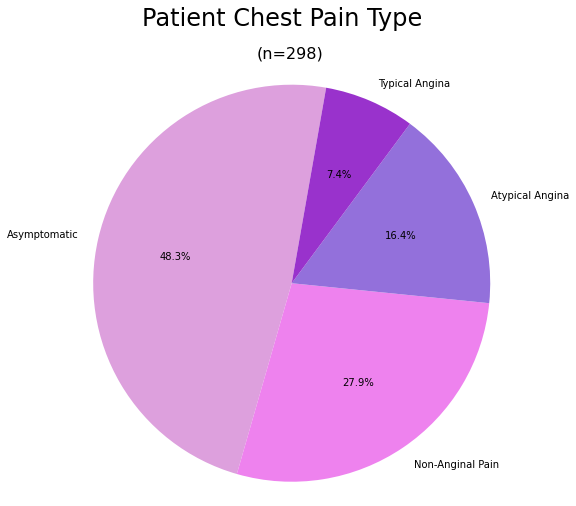

In [21]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

color_list = ['plum', 'violet', 'mediumpurple', 'darkorchid']

labels = ['Asymptomatic', 'Non-Anginal Pain',  'Atypical Angina', 'Typical Angina' ]
reqs = cpdf['cp']

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,8)

ax1.pie(reqs, labels=labels, colors = color_list, autopct='%1.1f%%', shadow=False, startangle=80)
ax1.axis('equal')  

plt.suptitle("Patient Chest Pain Type".format(len(data)), fontsize = 24)
plt.title("(n=298)".format(len(data)), fontsize = 16)

plt.show()

# Histograms for continuous variables to understand distributions

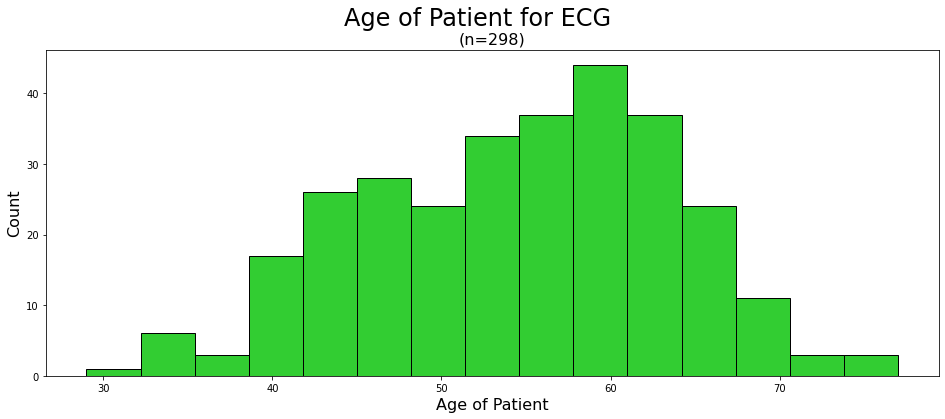

In [22]:
# create histpgram

fig = plt.figure(figsize = (16,6))

plt.xlabel('Age of Patient', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Age of Patient for ECG', fontsize = 24)
plt.title('(n=298)', fontsize = 16)

x = data['age']
num_bins = 15

n, bins, patches = plt.hist(x, num_bins, color='limegreen', edgecolor='black', linewidth=1)

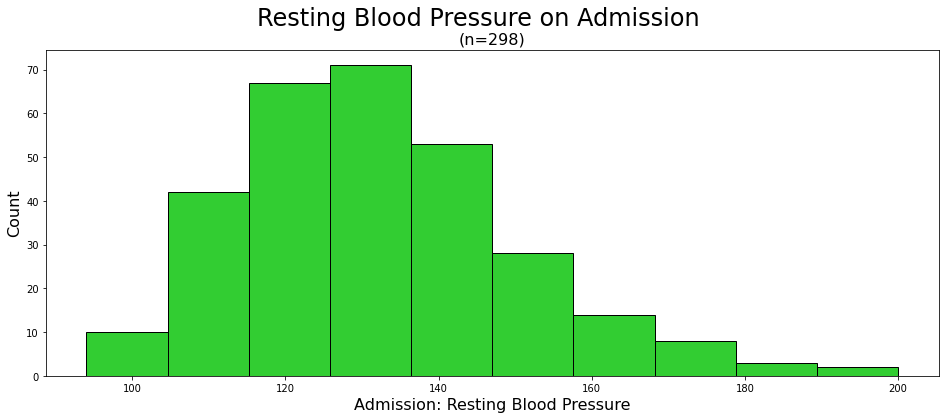

In [23]:
# create histpgram

fig = plt.figure(figsize = (16,6))

plt.xlabel('Admission: Resting Blood Pressure', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Resting Blood Pressure on Admission', fontsize = 24)
plt.title('(n=298)', fontsize = 16)

x = data['trestbps']
num_bins = 10

n, bins, patches = plt.hist(x, num_bins, color='limegreen', edgecolor='black', linewidth=1)

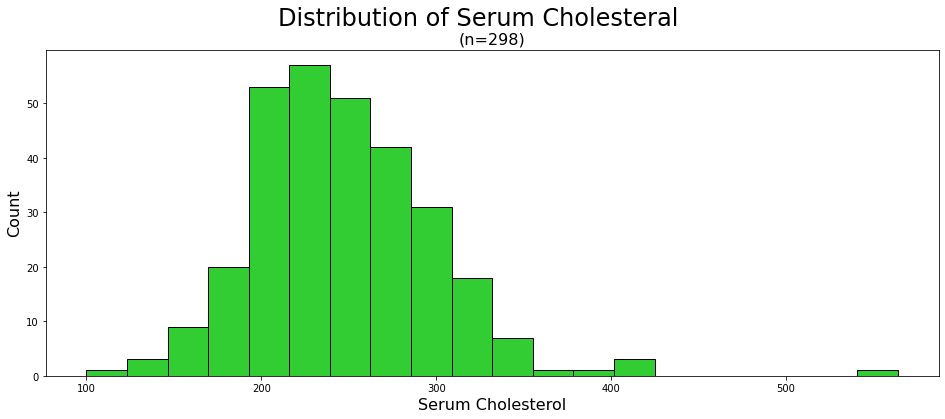

In [24]:
# create histpgram

fig = plt.figure(figsize = (16,6))

plt.xlabel('Serum Cholesterol', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Distribution of Serum Cholesteral', fontsize = 24)
plt.title('(n=298)', fontsize = 16)

x = data['chol']
num_bins = 20

n, bins, patches = plt.hist(x, num_bins, color='limegreen', edgecolor='black', linewidth=1)

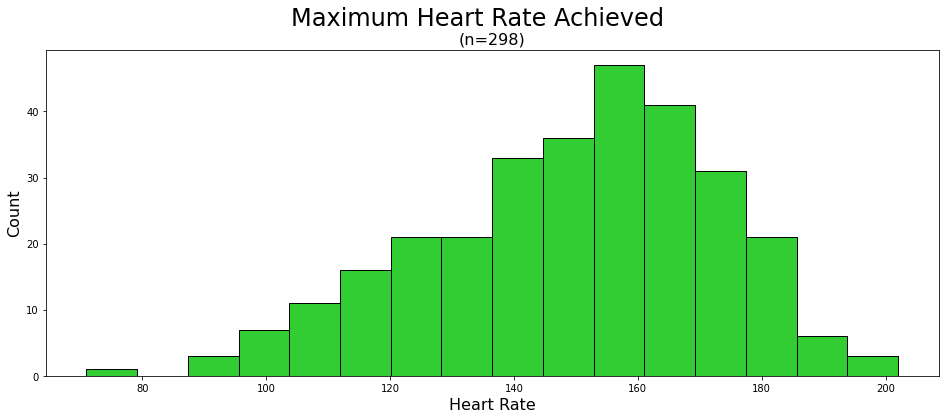

In [25]:
# create histpgram

fig = plt.figure(figsize = (16,6))

plt.xlabel('Heart Rate', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Maximum Heart Rate Achieved', fontsize = 24)
plt.title('(n=298)', fontsize = 16)

x = data['thalach']
num_bins = 16

n, bins, patches = plt.hist(x, num_bins, color='limegreen', edgecolor='black', linewidth=1)

In [26]:
ave_age = np.mean(data['age'])
note1 = colored('\033[1m' + "Average age of patient in dataset: {}".format(round(ave_age,1)), color = 'green')

ave_bps = np.mean(data['trestbps'])
note2 = colored('\033[1m' + "Average Resting Blood Pressure on Admission: {}".format(round(ave_bps,1)), color = 'green')

ave_chol = np.mean(data['chol'])
note3 = colored('\033[1m' + "Average Serum Cholesterol: {}".format(round(ave_chol,1)), color = 'green')

ave_maxrate = np.mean(data['thalach'])
note4 = colored('\033[1m' + "Average Maximum Heart Rate Achieved: {}".format(round(ave_maxrate,1)), color = 'green')

print(note1)
print(note2)
print(note3)
print(note4)

Average age of patient in dataset: 54.5
Average Resting Blood Pressure on Admission: 131.7
Average Serum Cholesterol: 246.8
Average Maximum Heart Rate Achieved: 149.3


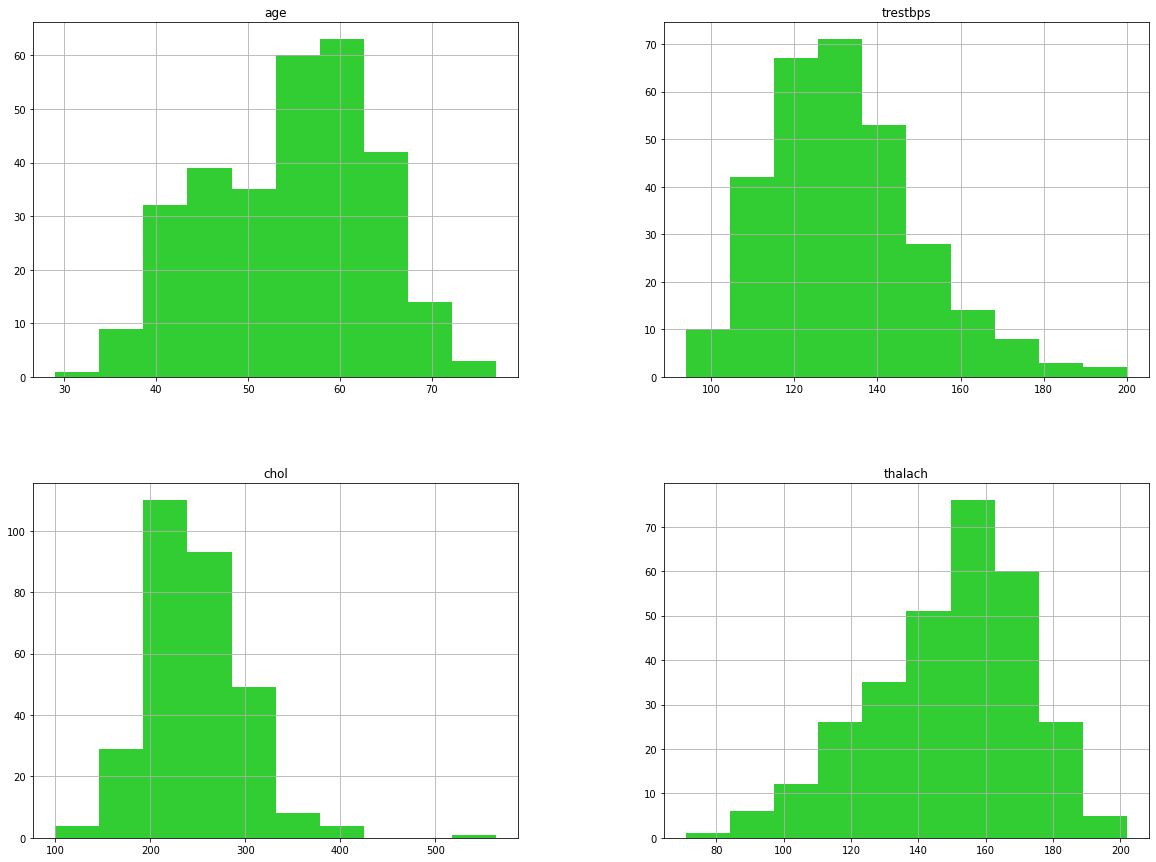

In [27]:
# histogram matrix

data_hist = data[['age', 'trestbps', 'chol', 'thalach']]
data_hist.hist(bins=10, color = 'limegreen', figsize=(20, 15));

## Test continuous variables for normality

In [28]:
norm_test_age = kstest(data['age'], 'norm')
norm_test_trestbps = kstest(data['trestbps'], 'norm')
norm_test_chol = kstest(data['chol'], 'norm')
norm_test_thalach = kstest(data['thalach'], 'norm')

print('Kolmogorov-Smirnov Test For Normality Results')
print('---------------------------------------------')
print('Age:', norm_test_age)
print('Resting Heart Rate:', norm_test_trestbps)
print('Serum Cholesterol Levels:', norm_test_chol)
print('Maximum Heart Rate Achieved:', norm_test_thalach)
print()
print('*a p-value <.05 indicates non-normal')
print('All four distributions are non-normal')

Kolmogorov-Smirnov Test For Normality Results
---------------------------------------------
Age: KstestResult(statistic=1.0, pvalue=0.0)
Resting Heart Rate: KstestResult(statistic=1.0, pvalue=0.0)
Serum Cholesterol Levels: KstestResult(statistic=1.0, pvalue=0.0)
Maximum Heart Rate Achieved: KstestResult(statistic=1.0, pvalue=0.0)

*a p-value <.05 indicates non-normal
All four distributions are non-normal


## Test continuous variables for skewness

In [31]:
print('Skewness Test For Continuous Variables')
print('--------------------------------------')
print('\nSkewness for data : ', skew(data['age']))
print('Skewness for data : ', skew(data['trestbps']))
print('Skewness for data : ', skew(data['chol']))
print('Skewness for data : ', skew(data['thalach']))

print()
print('*a value of 0 indicates no skew (normally distributed)')
print('*a positive or negative value indicates pos or neg skew')
print('All four distributions are skewed')

Skewness Test For Continuous Variables
--------------------------------------

Skewness for data :  -0.2076933955544476
Skewness for data :  0.699524463595343
Skewness for data :  1.025470815768914
Skewness for data :  -0.5259277898301957

*a value of 0 indicates no skew (normally distributed)
*a positive or negative value indicates pos or neg skew
All four distributions are skewed


# Scatterplots to explore relationships between variables

Text(0, 0.5, 'Resting Heart Rate on Admission')

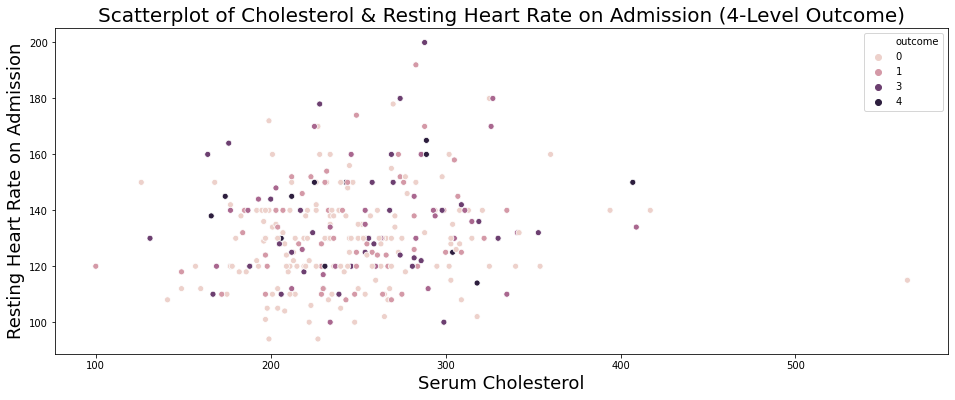

In [32]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.scatterplot(x = 'chol', y = 'trestbps', data=data, hue = 'outcome', x_jitter = 2.0)
scatter.set_title('Scatterplot of Cholesterol & Resting Heart Rate on Admission (4-Level Outcome)', fontsize = 20)
scatter.set_xlabel('Serum Cholesterol', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Resting Heart Rate on Admission')

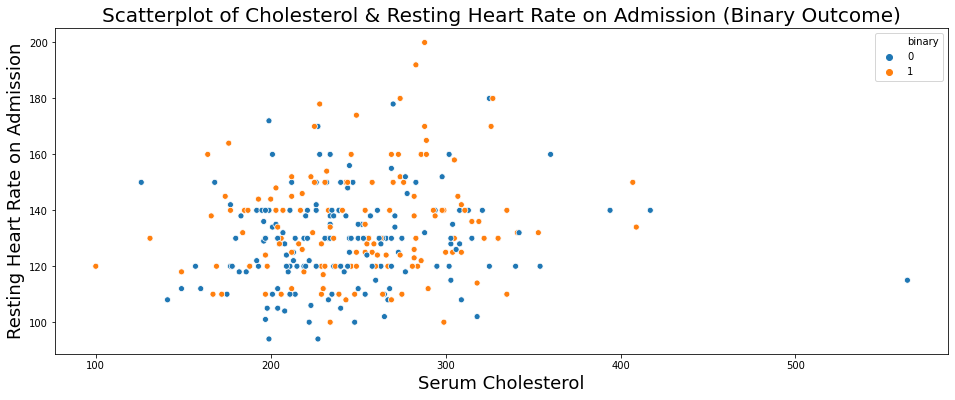

In [33]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.scatterplot(x = 'chol', y = 'trestbps', data=data, hue = 'binary', x_jitter = 2.0)
scatter.set_title('Scatterplot of Cholesterol & Resting Heart Rate on Admission (Binary Outcome)', fontsize = 20)
scatter.set_xlabel('Serum Cholesterol', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Resting Heart Rate on Admission')

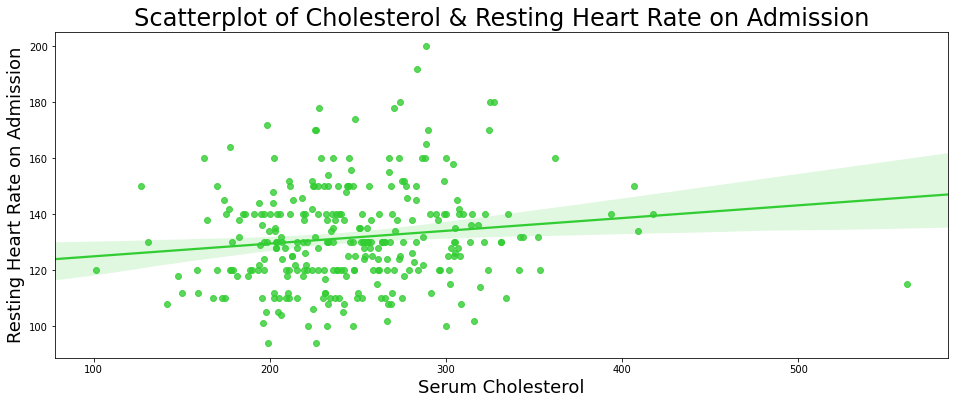

In [34]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.regplot(x = 'chol', y = 'trestbps', data=data, color = 'limegreen', x_jitter = 2.0)
scatter.set_title('Scatterplot of Cholesterol & Resting Heart Rate on Admission', fontsize = 24)
scatter.set_xlabel('Serum Cholesterol', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Resting Heart Rate on Admission')

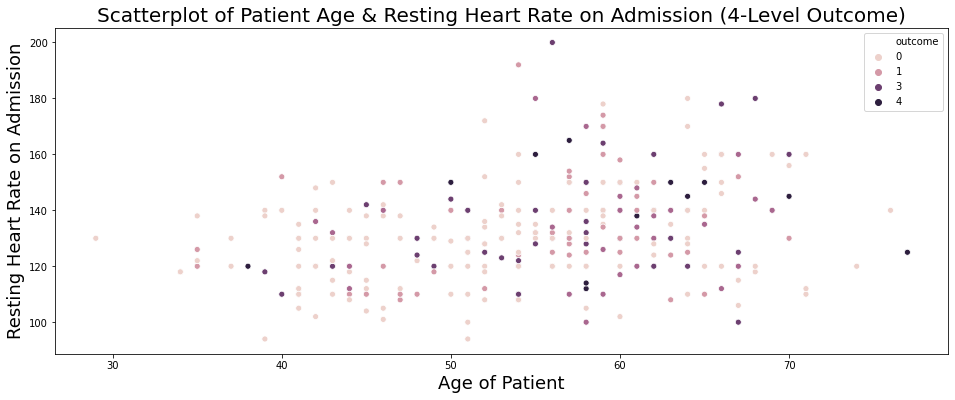

In [35]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.scatterplot(x = 'age', y = 'trestbps', data=data, hue = 'outcome', x_jitter = 2.0)
scatter.set_title('Scatterplot of Patient Age & Resting Heart Rate on Admission (4-Level Outcome)', fontsize = 20)
scatter.set_xlabel('Age of Patient', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Resting Heart Rate on Admission')

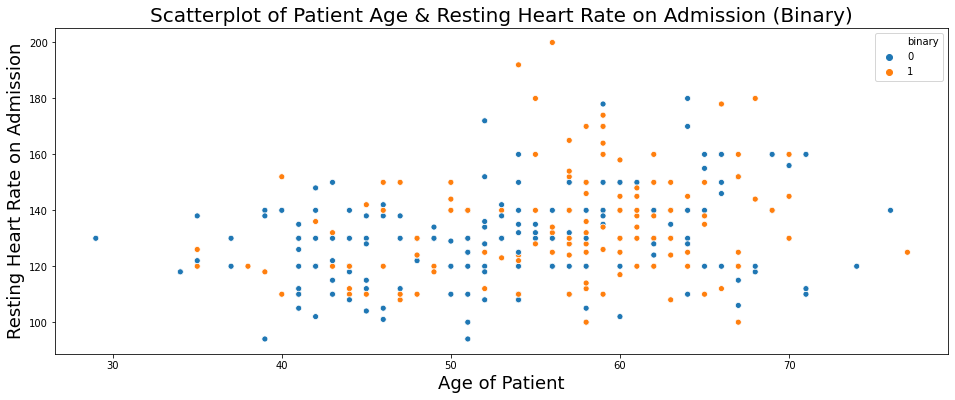

In [36]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.scatterplot(x = 'age', y = 'trestbps', data=data, hue = 'binary', x_jitter = 2.0)
scatter.set_title('Scatterplot of Patient Age & Resting Heart Rate on Admission (Binary)', fontsize = 20)
scatter.set_xlabel('Age of Patient', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Resting Heart Rate on Admission')

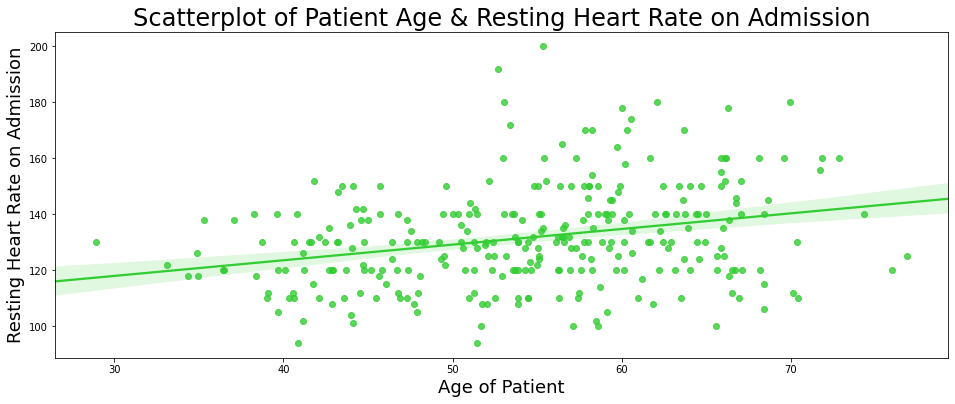

In [37]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.regplot(x = 'age', y = 'trestbps', data=data, color = 'limegreen', x_jitter = 2.0)
scatter.set_title('Scatterplot of Patient Age & Resting Heart Rate on Admission', fontsize = 24)
scatter.set_xlabel('Age of Patient', fontsize = 18)
scatter.set_ylabel ('Resting Heart Rate on Admission', fontsize = 18)

Text(0, 0.5, 'Maximum Heart Rate Achieved')

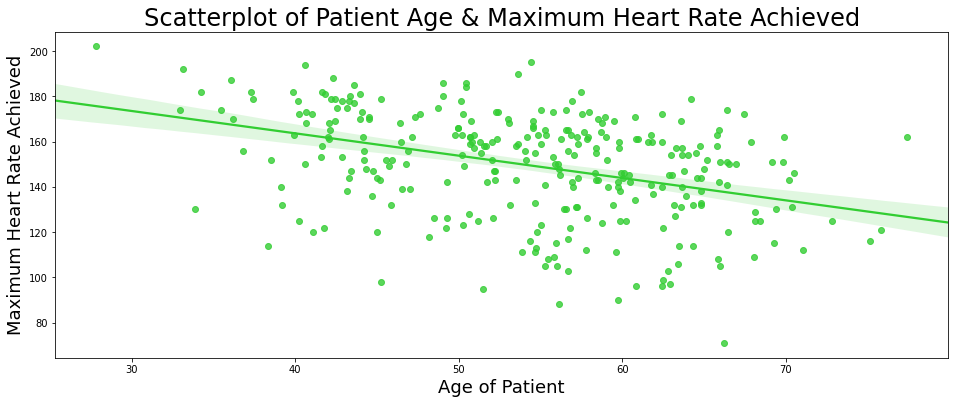

In [38]:
# scatterplot

fig, scatter = plt.subplots(figsize = (16,6))
scatter = sns.regplot(x = 'age', y = 'thalach', data=data, color = 'limegreen', x_jitter = 2.0)
scatter.set_title('Scatterplot of Patient Age & Maximum Heart Rate Achieved', fontsize = 24)
scatter.set_xlabel('Age of Patient', fontsize = 18)
scatter.set_ylabel ('Maximum Heart Rate Achieved', fontsize = 18)

## Calculate Correlation Between Continuous Variables

In [39]:
# calculate correlation between variables

corr1 = pearsonr(data['age'], data['chol'])
corr2 = pearsonr(data['age'], data['trestbps'])
corr3 = pearsonr(data['age'], data['thalach'])
corr4 = pearsonr(data['chol'], data['trestbps'])
corr5 = pearsonr(data['chol'], data['thalach'])
corr6 = pearsonr(data['trestbps'], data['thalach'])

print('Correlation Coefficient + Signifcance')
print('-------------------------------------')
print('Age and Cholesterol:', corr1)
print('Age and Resting Heart Rate:', corr2)
print('Age and Max. Heart Rate:', corr3)
print('Cholesterol and Resting Heart Rate:', corr4)
print('Cholesterol and Max. Heart Rate:', corr5)
print('Resting Heart Rate and Max. Heart Rate:', corr6)

Correlation Coefficient + Signifcance
-------------------------------------
Age and Cholesterol: (0.20040876914258923, 0.0005006152100132003)
Age and Resting Heart Rate: (0.28447349452511217, 5.923744177483535e-07)
Age and Max. Heart Rate: (-0.3848400312116751, 5.888547515506296e-12)
Cholesterol and Resting Heart Rate: (0.13504486069783972, 0.01969379537139581)
Cholesterol and Max. Heart Rate: (0.014921555021208493, 0.7975511221717982)
Resting Heart Rate and Max. Heart Rate: (-0.05344371329402407, 0.35790659220029947)


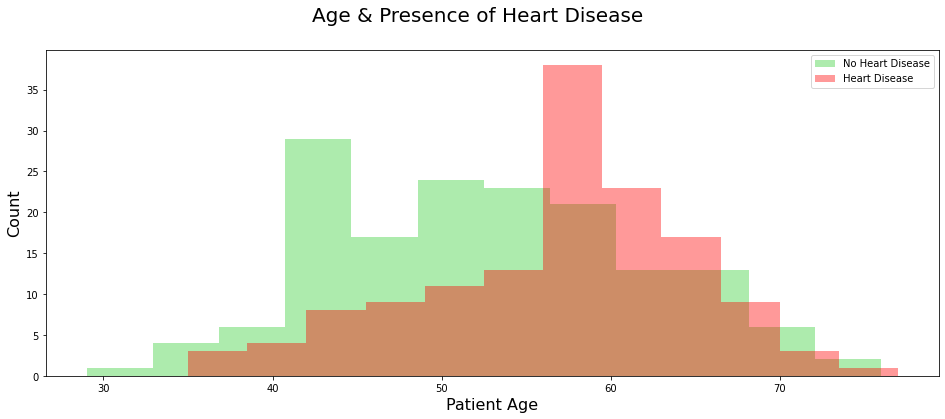

Average Age No Heart Disease: 52.57861635220126
Average Age Yes Heart Disease: 56.68345323741007


In [40]:
# Histogram of patient age split by heart disease outcome

data0 = data[data['binary'] == 0]
data1 = data[data['binary'] == 1]

fig = plt.figure(figsize = (16,6))

plt.xlabel('Patient Age', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.suptitle('Age & Presence of Heart Disease', fontsize = 20)

x = data0['age']
y = data1['age']
num_bins =12

n, bins, patches = plt.hist(x, num_bins, color='limegreen', alpha = 0.4, label = 'No Heart Disease')
n, bins, patches = plt.hist(y, num_bins, color='red', alpha = 0.4, label = 'Heart Disease')

plt.legend()
plt.show()
print('Average Age No Heart Disease:', np.mean(x))
print('Average Age Yes Heart Disease:', np.mean(y))

# Machine Learning Ensemble Model

In [17]:
# import libraries for ensemble model

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [23]:
# scale the data for modeling

scaler = MinMaxScaler(feature_range=(0, 1))
normdata = scaler.fit_transform(data)

In [24]:
# identify explanatory and outcome variables

X = normdata[:,0:12]
y = normdata[:,14]   # using binary outcome

In [25]:
# split into training and test datasets using sklearn train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

# Model Selection

## K Nearest Neighbor Classifier

In [30]:
# determine which value of k produces the highest accuracy

k = 3

while k <20:
    print(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    k+=2

3
Accuracy: 0.8266666666666667
5
Accuracy: 0.8133333333333334
7
Accuracy: 0.8
9
Accuracy: 0.84
11
Accuracy: 0.8133333333333334
13
Accuracy: 0.8
15
Accuracy: 0.8533333333333334
17
Accuracy: 0.8
19
Accuracy: 0.8133333333333334


### Use k = 15

## Decision Tree Classification

In [31]:
# determine depth that produces the highest accuracy


m=2

while m < 8:
    print(m)
    clf = DecisionTreeClassifier(max_depth = m)
    clf = clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    m+=1

2
Accuracy: 0.76
3
Accuracy: 0.8133333333333334
4
Accuracy: 0.8266666666666667
5
Accuracy: 0.8
6
Accuracy: 0.8
7
Accuracy: 0.7866666666666666


### use m = 4

## Random Forest Classification

In [32]:
clf = RandomForestClassifier(n_estimators=150)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8666666666666667


## Final Models

In [33]:
# determine which model types will be in the ensemble model

mod1 = LogisticRegression()
mod2 = KNeighborsClassifier(n_neighbors = 15)
mod3 = SVC()
mod4 = GaussianNB()
mod5 = DecisionTreeClassifier(max_depth = 4)
mod6 = RandomForestClassifier(n_estimators=150)

In [34]:
# train the ML models

with warnings.catch_warnings():
    warnings.filterwarnings("ignore") 
    mod1.fit(X_train, y_train)
    mod2.fit(X_train, y_train)
    mod3.fit(X_train, y_train)
    mod4.fit(X_train, y_train)
    mod5.fit(X_train, y_train)
    mod6.fit(X_train, y_train)

In [35]:
# predictions

y_pred1 = mod1.predict(X_test)
y_pred2 = mod2.predict(X_test)
y_pred3 = mod3.predict(X_test)
y_pred4 = mod4.predict(X_test)
y_pred5 = mod5.predict(X_test)
y_pred6 = mod6.predict(X_test)

In [36]:
# confusion matrices

cm_logist = confusion_matrix(y_test, y_pred1)
cm_knn = confusion_matrix(y_test, y_pred2)
cm_svm = confusion_matrix(y_test, y_pred3)
cm_nb = confusion_matrix(y_test, y_pred4)
cm_dt = confusion_matrix(y_test, y_pred5)
cm_rf = confusion_matrix(y_test, y_pred6)

In [37]:
# perform cross-validation 

with warnings.catch_warnings():

    warnings.filterwarnings("ignore")
    
    kfold = model_selection.KFold(n_splits=10, random_state = 0)
    
    logist = model_selection.cross_val_score(mod1, X_train, y_train, cv=kfold)
    knn = model_selection.cross_val_score(mod2, X_train, y_train, cv=kfold)
    svc = model_selection.cross_val_score(mod3, X_train, y_train, cv=kfold)
    nb = model_selection.cross_val_score(mod4, X_train, y_train, cv=kfold)
    dt = model_selection.cross_val_score(mod5, X_train, y_train, cv=kfold)
    rf = model_selection.cross_val_score(mod6, X_train, y_train, cv=kfold)

In [38]:
# print cross-validation accuracy

print('ACCURACY OF MODELS')
print('------------------')
print('Logistic Regression: {}'.format(round(logist.mean(),3)))
print('KNN: {}'.format(round(knn.mean(),3)))
print('Support Vector: {}'.format(round(svc.mean(),3)))
print('Gaussian: {}'.format(round(nb.mean(),3)))
print('Decision Tree: {}'.format(round(dt.mean(),3)))
print('Random Forest: {}'.format(round(rf.mean(),3)))

res_log = round(logist.mean(),3)
res_knn = round(knn.mean(),3)
res_svm = round(svc.mean(),3)
res_gau = round(nb.mean(),3)
res_dec = round(dt.mean(),3)
res_rf = round(rf.mean(),3)

ACCURACY OF MODELS
------------------
Logistic Regression: 0.789
KNN: 0.763
Support Vector: 0.794
Gaussian: 0.794
Decision Tree: 0.682
Random Forest: 0.802


### Based on these results, removing Decision Tree Classifier

## Ensemble Learning Model

In [41]:
# hybrid ensemble model

estimates = []

with warnings.catch_warnings():

    warnings.filterwarnings("ignore")
    
    # logistic regression
    mod_log1 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic1', mod_log1))
    mod_log2 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic2', mod_log2))
    mod_log3 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic3', mod_log3))
    mod_log4 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic4', mod_log4))
    mod_log5 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic5', mod_log5))

    
    # random forest 
    mod_rf1 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest1', mod_rf1))
    mod_rf2 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest2', mod_rf2))
    mod_rf3 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest3', mod_rf3))
    mod_rf4 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest4', mod_rf4))
    mod_rf5 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest5', mod_rf5))
    
        
    # svc
    mod_svc1 = SVC(kernel = 'linear')
    estimates.append(('svc1', mod_svc1))
    mod_svc2 = SVC(kernel = 'poly')
    estimates.append(('svc2', mod_svc2))
    mod_svc3 = SVC(kernel = 'rbf')
    estimates.append(('svc3', mod_svc3))
    mod_svc4 = SVC(kernel = 'rbf')
    estimates.append(('svc4', mod_svc4))
    mod_svc5 = SVC(kernel = 'rbf')
    estimates.append(('svc5', mod_svc5))
    
    # knn
    mod_knn1 = KNeighborsClassifier(n_neighbors = 5)
    estimates.append(('knn1', mod_knn1))
    mod_knn2 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn2', mod_knn2))
    mod_knn3 = KNeighborsClassifier(n_neighbors = 5)
    estimates.append(('knn3', mod_knn3))
    mod_knn4 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn4', mod_knn4))
    mod_knn5 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn5', mod_knn5))
    
    # nb
    mod_nb1 = GaussianNB()
    estimates.append(('nbs1', mod_nb1))
    mod_nb2 = GaussianNB()
    estimates.append(('nbs2', mod_nb2))
    mod_nb3 = GaussianNB()
    estimates.append(('nbs3', mod_nb3))
    mod_nb4 = GaussianNB()
    estimates.append(('nbs4', mod_nb4))
    mod_nb5 = GaussianNB()
    estimates.append(('nbs5', mod_nb5))



    # ensemble model
    ensemble = VotingClassifier(estimates, voting = 'hard')
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)

    # confusion matrix
    cm_ensemble = confusion_matrix(y_test, y_pred)
    
total = cm_ensemble[0,0] + cm_ensemble[0,1] +cm_ensemble[1,0] +cm_ensemble[1,1]
correct = cm_ensemble[0,0] + cm_ensemble[1,1]
ensemble_accuracy = correct/total
print('Ensemble Accuracy: ', ensemble_accuracy)

Ensemble Accuracy:  0.84


In [40]:
# cross-validation

seed = 20

with warnings.catch_warnings():

    warnings.filterwarnings("ignore")
    
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cross_val_results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
    print(cross_val_results.mean())
    
    cross_val_results = cross_val_results.mean()

0.7938735177865612


# Bagging (Bootstrap Aggregation)

In [29]:
# Bagging Classification Method

seed = 8
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
clf = RandomForestClassifier(n_estimators=150)
  
num_trees = 100
  
# bagging classifier
model = BaggingClassifier(base_estimator = clf, n_estimators = 20, random_state = seed)
  
bag_results = model_selection.cross_val_score(model, X, y, cv = kfold)
bag_results = bag_results.mean()
bag_results

0.8318390804597702

# Boosting (AdaBoost)

In [43]:
# adaboost classifer

ada = AdaBoostClassifier(n_estimators=10, learning_rate=1)

# train classifer
model = ada.fit(X_train, y_train)

# prediction from test set
y_pred = model.predict(X_test)

boost_results = metrics.accuracy_score(y_test, y_pred)

boost_results

0.8266666666666667

# Visualize Ensemble Learning Results

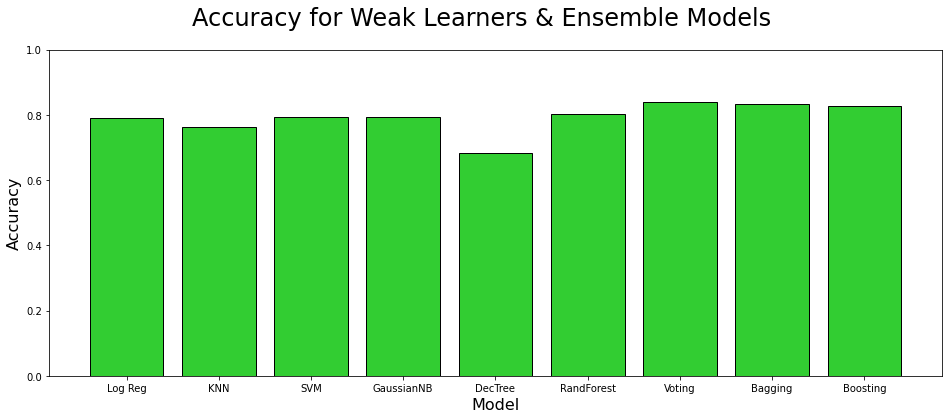

In [44]:
# Bar chart of all ensemble model results

all_results = [res_log, res_knn, res_svm, res_gau, res_dec, res_rf, ensemble_accuracy, bag_results, boost_results]
models = ['Log Reg', 'KNN', 'SVM', 'GaussianNB', 'DecTree', 'RandForest', 'Voting', 'Bagging', 'Boosting' ]

fig = plt.figure(figsize = (16,6))
plt.bar(models, all_results, color = 'limegreen', edgecolor = 'black')

plt.xlabel('Model', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.suptitle('Accuracy for Weak Learners & Ensemble Models', fontsize = 24)
plt.ylim(0,1)
plt.show()

In [45]:
all_results

[0.789,
 0.763,
 0.794,
 0.794,
 0.682,
 0.802,
 0.84,
 0.8318390804597702,
 0.8266666666666667]

In [46]:
# saving the dataframe
data.to_csv('cardiac.csv')

# Test on new data

In [18]:
# import the four files

uci_va = pd.read_csv("uci_va.txt", sep=",")
uci_sw = pd.read_csv("uci_sw.txt", sep=",")
uci_hu = pd.read_csv("uci_hu.txt", sep=",")
uci_cl = pd.read_csv("uci_cl.txt", sep=",")

# name columns

uci_va.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_sw.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_hu.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']
uci_cl.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome']

# concatenate dataframes

uci = pd.concat([uci_va, uci_sw, uci_hu, uci_cl], axis=0)

# replace missing with nan

uci.replace('?',np.nan, inplace=True)

# count non missing values in each row

# create 'binary' outcome

uci['binary'] = [0 if x < 1 else 1 for x in uci['outcome']]

uci['non_missing_count'] = uci.apply(lambda x: x.count(), axis=1)
uci['non_missing_count'].value_counts()

15    298
12    251
13    207
14     74
8      51
11     29
10      3
7       2
9       1
Name: non_missing_count, dtype: int64

## Create new dataset using cases missing 1 or 2 values

In [19]:
newdata = uci[(uci['non_missing_count'] == 12) | (uci['non_missing_count'] == 13) | (uci['non_missing_count'] == 14)]
len(newdata)

532

In [20]:
# drop the non_missing_count column

newdata = newdata.drop('non_missing_count', axis = 1)

In [21]:
# replace missing values with 0

newdata = newdata.replace(np.nan, 0)

In [22]:
# print the number of NaN values for each column

colnames = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                  'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'outcome', 'binary']

for i in colnames:
    print('Variable: ',i)
    s = newdata[i].isnull().sum()
    print('Number NaN: {}  % NaN: {}'.format(s, round(100*s/len(uci),2)))
    print()

Variable:  age
Number NaN: 0  % NaN: 0.0

Variable:  sex
Number NaN: 0  % NaN: 0.0

Variable:  cp
Number NaN: 0  % NaN: 0.0

Variable:  trestbps
Number NaN: 0  % NaN: 0.0

Variable:  chol
Number NaN: 0  % NaN: 0.0

Variable:  fbs
Number NaN: 0  % NaN: 0.0

Variable:  restecg
Number NaN: 0  % NaN: 0.0

Variable:  thalach
Number NaN: 0  % NaN: 0.0

Variable:  exang
Number NaN: 0  % NaN: 0.0

Variable:  oldpeak
Number NaN: 0  % NaN: 0.0

Variable:  slope
Number NaN: 0  % NaN: 0.0

Variable:  ca
Number NaN: 0  % NaN: 0.0

Variable:  thal
Number NaN: 0  % NaN: 0.0

Variable:  outcome
Number NaN: 0  % NaN: 0.0

Variable:  binary
Number NaN: 0  % NaN: 0.0



In [23]:
# scale the data for modeling

scaler = MinMaxScaler(feature_range=(0, 1))
normnewdata = scaler.fit_transform(newdata)

# identify explanatory and outcome variables

X = normnewdata[:,0:12]
y = normnewdata[:,14]   # using binary outcome

# split into training and test datasets using sklearn train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

## Ensemble Learning Model

In [24]:
# hybrid ensemble model

estimates = []

with warnings.catch_warnings():

    warnings.filterwarnings("ignore")
    
    # logistic regression
    mod_log1 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic1', mod_log1))
    mod_log2 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic2', mod_log2))
    mod_log3 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic3', mod_log3))
    mod_log4 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic4', mod_log4))
    mod_log5 = LogisticRegression(penalty = 'l2', random_state = 0)
    estimates.append(('logistic5', mod_log5))

    
    # random forest 
    mod_rf1 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest1', mod_rf1))
    mod_rf2 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest2', mod_rf2))
    mod_rf3 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest3', mod_rf3))
    mod_rf4 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest4', mod_rf4))
    mod_rf5 = RandomForestClassifier(n_estimators=150)
    estimates.append(('forest5', mod_rf5))
    
        
    # svc
    mod_svc1 = SVC(kernel = 'linear')
    estimates.append(('svc1', mod_svc1))
    mod_svc2 = SVC(kernel = 'poly')
    estimates.append(('svc2', mod_svc2))
    mod_svc3 = SVC(kernel = 'rbf')
    estimates.append(('svc3', mod_svc3))
    mod_svc4 = SVC(kernel = 'rbf')
    estimates.append(('svc4', mod_svc4))
    mod_svc5 = SVC(kernel = 'rbf')
    estimates.append(('svc5', mod_svc5))
    
    # knn
    mod_knn1 = KNeighborsClassifier(n_neighbors = 5)
    estimates.append(('knn1', mod_knn1))
    mod_knn2 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn2', mod_knn2))
    mod_knn3 = KNeighborsClassifier(n_neighbors = 5)
    estimates.append(('knn3', mod_knn3))
    mod_knn4 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn4', mod_knn4))
    mod_knn5 = KNeighborsClassifier(n_neighbors = 6)
    estimates.append(('knn5', mod_knn5))
    
    # nb
    mod_nb1 = GaussianNB()
    estimates.append(('nbs1', mod_nb1))
    mod_nb2 = GaussianNB()
    estimates.append(('nbs2', mod_nb2))
    mod_nb3 = GaussianNB()
    estimates.append(('nbs3', mod_nb3))
    mod_nb4 = GaussianNB()
    estimates.append(('nbs4', mod_nb4))
    mod_nb5 = GaussianNB()
    estimates.append(('nbs5', mod_nb5))



    # ensemble model
    ensemble = VotingClassifier(estimates, voting = 'hard')
    ensemble.fit(X_train, y_train)
    y_pred = ensemble.predict(X_test)

    # confusion matrix
    cm_ensemble = confusion_matrix(y_test, y_pred)
    
total = cm_ensemble[0,0] + cm_ensemble[0,1] +cm_ensemble[1,0] +cm_ensemble[1,1]
correct = cm_ensemble[0,0] + cm_ensemble[1,1]
ensemble_accuracy = correct/total
print('Ensemble Accuracy: ', ensemble_accuracy)

Ensemble Accuracy:  0.7819548872180451


## Bagging Technique

In [25]:
# Bagging Classification Method

seed = 8
kfold = model_selection.KFold(n_splits = 10, random_state = seed)
clf = RandomForestClassifier(n_estimators=150)
  
num_trees = 100
  
# bagging classifier
model = BaggingClassifier(base_estimator = clf, n_estimators = 20, random_state = seed)
  
bag_results = model_selection.cross_val_score(model, X, y, cv = kfold)
bag_results = bag_results.mean()
bag_results

0.7573375262054507

## Boosting Technique (AdaBoost)

In [27]:
# adaboost classifer

ada = AdaBoostClassifier(n_estimators=10, learning_rate=1)

# train classifer
model = ada.fit(X_train, y_train)

# prediction from test set
y_pred = model.predict(X_test)

boost_results = metrics.accuracy_score(y_test, y_pred)

boost_results

0.7819548872180451

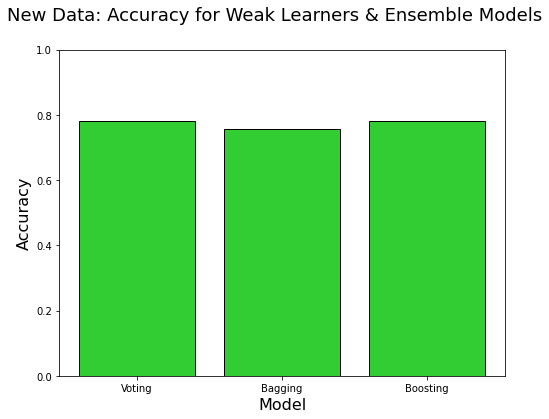

In [28]:
# Bar chart of all ensemble model results

new_results = [ensemble_accuracy, bag_results, boost_results]
models = ['Voting', 'Bagging', 'Boosting' ]

fig = plt.figure(figsize = (8,6))
plt.bar(models, new_results, color = 'limegreen', edgecolor = 'black')

plt.xlabel('Model', fontsize = 16)
plt.ylabel('Accuracy', fontsize = 16)
plt.suptitle('New Data: Accuracy for Weak Learners & Ensemble Models', fontsize = 18)
plt.ylim(0,1)
plt.show()

In [29]:
new_results

[0.7819548872180451, 0.7573375262054507, 0.7819548872180451]